In [1]:
import pandas as pd
import sqlite3
import numpy as np
import parse_dados_banco as pd

In [2]:
import estrategias as es

In [3]:
import matplotlib.pyplot as plt
import mplfinance as mpf

In [4]:
r_existe_dados, bd_candle = pd.pega_dados_since_db(5000)
valores_para_ser_acionado = list(np.arange(1, 5, 0.06))

In [5]:
valores_para_ser_acionado


[1.0,
 1.06,
 1.12,
 1.1800000000000002,
 1.2400000000000002,
 1.3000000000000003,
 1.3600000000000003,
 1.4200000000000004,
 1.4800000000000004,
 1.5400000000000005,
 1.6000000000000005,
 1.6600000000000006,
 1.7200000000000006,
 1.7800000000000007,
 1.8400000000000007,
 1.9000000000000008,
 1.9600000000000009,
 2.020000000000001,
 2.080000000000001,
 2.140000000000001,
 2.200000000000001,
 2.260000000000001,
 2.320000000000001,
 2.3800000000000012,
 2.4400000000000013,
 2.5000000000000013,
 2.5600000000000014,
 2.6200000000000014,
 2.6800000000000015,
 2.7400000000000015,
 2.8000000000000016,
 2.8600000000000017,
 2.9200000000000017,
 2.9800000000000018,
 3.040000000000002,
 3.100000000000002,
 3.160000000000002,
 3.220000000000002,
 3.280000000000002,
 3.340000000000002,
 3.400000000000002,
 3.460000000000002,
 3.5200000000000022,
 3.5800000000000023,
 3.6400000000000023,
 3.7000000000000024,
 3.7600000000000025,
 3.8200000000000025,
 3.8800000000000026,
 3.9400000000000026,
 4.0000

In [6]:
ls_valeos = list(filter(lambda x: x> 1.8 and x<2.8, valores_para_ser_acionado))

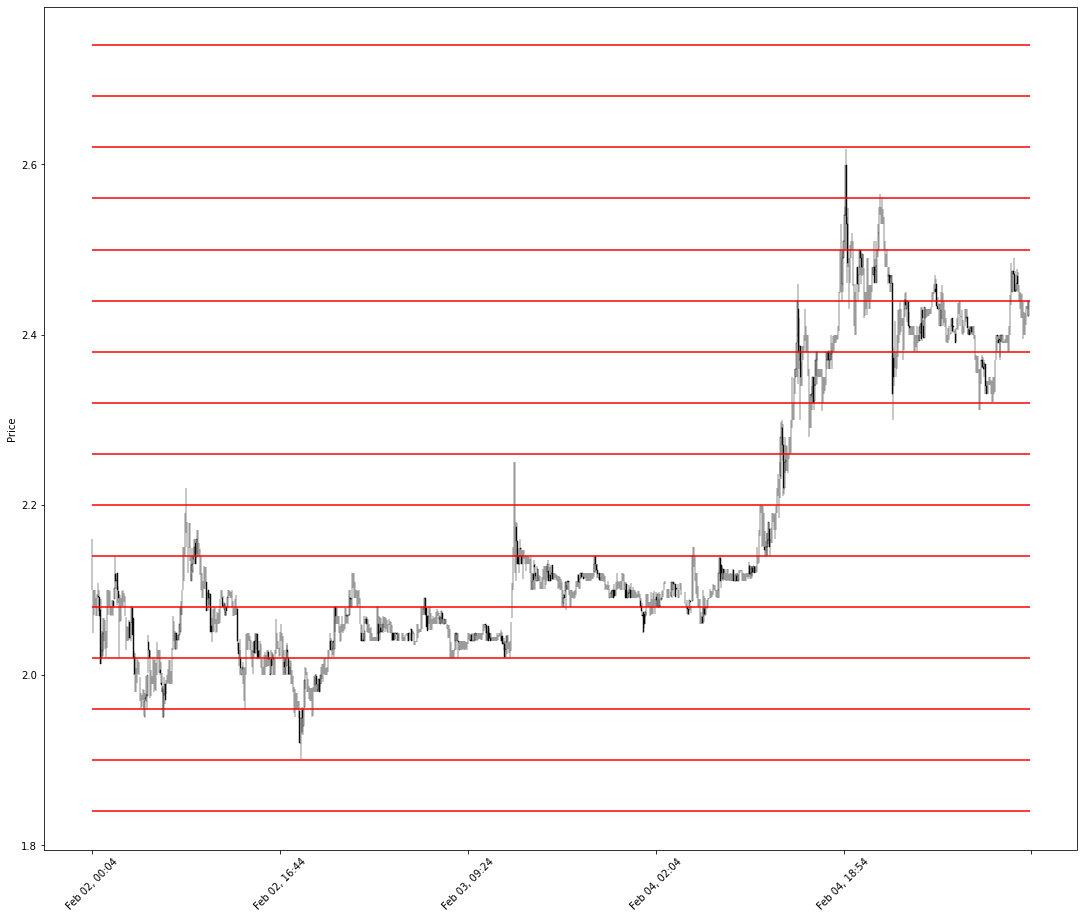

In [7]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 15.5)
# ax.scatter(bd_candle.index[:], bd_candle["close"])
mpf.plot(bd_candle,type='candle',ax=ax)


# ax.ylim([1, 4])
for linha in ls_valeos:
#     print(linha)
    ax.hlines(linha, xmin=0, xmax=len(bd_candle), color='r', linestyle='-')
    
# ax.show()

In [8]:
# valores_para_ser_acionado[5] % 0.06 == 0

In [9]:
def range_do_valor(valor, limite_inferior, limite_superior, variacao):
    range_bot = get_range(limite_inferior,limite_superior,variacao)
    for rang_sup, range_inf in range_bot:
        r_e_o_range = valor>range_inf and valor< rang_sup
        if r_e_o_range:
            rs_i = range_inf
            rs_s = rang_sup
            break
    return round(range_inf,8)
            
    

In [10]:
def get_range( limite_inferior, limite_superior, variacao):
    range_superior = np.arange(limite_inferior, limite_superior, variacao)
    range_inferior = np.arange(limite_inferior-variacao, limite_superior-variacao,variacao)
    range_bot = zip(range_superior,range_inferior)
    return range_bot

In [11]:
# def back_teste(df_valore):
def get_range( limite_inferior, limite_superior, variacao):
    range_superior = np.arange(limite_inferior, limite_superior, variacao)
    range_inferior = np.arange(limite_inferior-variacao, limite_superior-variacao,variacao)
    range_bot = zip(range_superior,range_inferior)
    return range_bot

def range_do_valor(valor, limite_inferior, limite_superior, variacao):
    range_bot = get_range(limite_inferior,limite_superior,variacao)
    for rang_sup, range_inf in range_bot:
        r_e_o_range = valor>range_inf and valor< rang_sup
        if r_e_o_range:
            rs_i = range_inf
            rs_s = rang_sup
            break
    return round(range_inf,8), round(rang_sup,8)
    

In [12]:
print(range_do_valor(2.54, 1, 4,0.05))

(2.5, 2.55)


In [13]:
operacao = (0.04 *2.54 )
operacao - operacao* 0.5*2/100


0.100584

In [14]:
operacao

0.10160000000000001

In [15]:
min(bd_candle.index)

Timestamp('2021-02-02 00:04:25')

In [16]:
max(bd_candle.index)

Timestamp('2021-02-05 11:19:25')

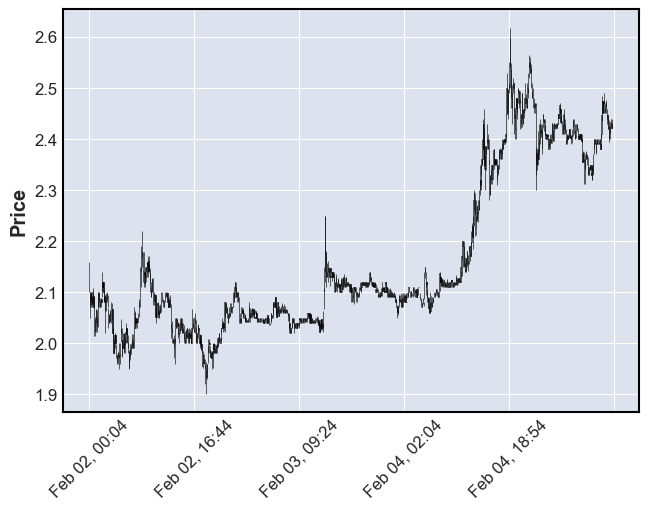

In [17]:
# bd_candle.head()
mpf.plot(bd_candle,type='candle')